In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import init_session
from IPython.display import HTML
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/U-bWDtbB4qY" frameborder="0" allowfullscreen></iframe>')
init_session()
rho, sigma, b = symbols('rho sigma b')

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


# Chapter 9: Lorenz Equations

p.309 of Strogatz, S (2015)

In [42]:
# Youtube
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/U-bWDtbB4qY" frameborder="0" allowfullscreen></iframe>')

In [46]:
#The basic equations
x_dot, y_dot, z_dot = sigma*(y-x), rho*x - y - x*z, x*y-b*z
x_dot, y_dot, z_dot

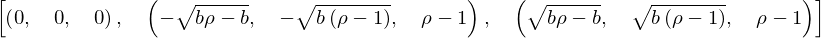

In [47]:
#Example 9.2.2: Find fixed points
#In a future version of sympy there is a plan to be able to add conditions like rho>1
fixed_points = solve([x_dot, y_dot, z_dot] ,[x,y,z])
fixed_points
#These can be indexed for use later...

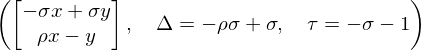

In [48]:
#Linear stability of the origin: p.322.
tau, Delta = symbols('tau Delta')
A = Matrix([[-sigma, sigma],[rho,-1]])
xx = Matrix([x,y])
determinant, trace = A.det(), A.trace()
stable_matrix = A*xx
stable_matrix, Eq(Delta,determinant),Eq(tau, trace)

In [49]:
factor(trace**2-4*determinant)

In [50]:
# Calculate:
V_dot = (1/sigma*x_dot*x + y_dot*y + z_dot*z)
V_dot

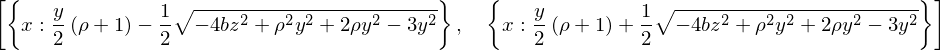

In [51]:
ans = solve([V_dot],[x,y,z])
ans

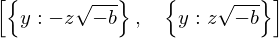

In [52]:
solve([ans[0][x].subs(rho,.5)],[y,z])


### 9.3 Chaos on a strange attractor.

This section helps visualise what plotting one axis, the y-axis, looks like over time. Of course one has to integrate against some starting values. 

In this instance, the code loads a script plotting the trajectory of the velocity over time, from which the values of $(x,y,z)$ are derived from $(x_0,y_0,z_0)$. 

In [53]:
# %load Lorenz\ attractor\ mayavi.py


# Please attribute to Llewelyn Richards-Ward,
#llewelyn62@icloud.com
#Use and distribute as you want.
from mayavi import mlab
import numpy as np
import numba as nb
from scipy.integrate import odeint

#Create figure
mlab.figure(size=(900,800), bgcolor=(0,0,0), fgcolor=(1,1,1))
#For a very basic  approach which shows the steps, this commented
#section can be used. The preferred method is to
#use scipy's odeint and an array/function combination, as below.
#Note the use of the Euler integration method.
#=========================================
#   # Integration time step
# dt = 0.001
#   # Lorenz ODE parameters
# sigma = 10.0
# r     = 28.0
# b     = 8.0/3.0
#   # Initial conditions
# x = -.5
# y =  .2
# z =  2.17
#   # Store the trajectory
# TrajX = []
# TrajY = []
# TrajZ = []
# Time  = []
#
#   # Integrate the Lorenz ODEs
#   #Pretty basic approach -- in real examples would
#   #use odeint and an array/function combination.
# for t in np.arange(0.,50.,dt):
# 	dxdt = sigma*(y - x)
# 	dydt = r * x - y - x * z
# 	dzdt = x * y - b * z
# 	x = x + dxdt * dt
# 	y = y + dydt * dt
# 	z = z + dzdt * dt
#
# 	TrajX.append(x)
# 	TrajY.append(y)
# 	TrajZ.append(z)
# 	Time.append(t)
#=========================================

# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 8/3, 28
u0, v0, w0 = 0, 1, 0

# Maximum time point and total number of time points
tmax, n = 50, 10000
@nb.jit(nopython=False) #optimises for speed.
def deriv_lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    x, y, z = X
    dx_dt = -sigma*(x - y)
    dy_dt = rho*x - y - x*z
    dz_dt = -beta*z + x*y
    return dx_dt, dy_dt, dz_dt

# Integrate the Lorenz equations on the time grid t
#Implements a detailed use of memory space for optimised accuracy, not
#so much speed.
@nb.jit('float64(float64,float64,float64,float64,float64,float64,float64,float64)',nopython=False)
def int_f(u0=u0,v0=v0,w0=w0,sigma=sigma,beta=beta,rho=rho,tma=tmax,n=n):
    t = np.linspace(0, tmax, n)
    f = odeint(deriv_lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
    return f
x1, y1, z1 = int_f().T
Time = np.linspace(0,tmax,n)
def plot_mayavi():
    mlab.plot3d(x1,y1,z1,Time,colormap='Spectral',tube_radius=0.3)
    mlab.outline(opacity=.4)
    mlab.points3d(0,0,0,opacity=.5)
    mlab.text3d(0,0,0,'Origin')
    mlab.points3d(np.sqrt(beta*(rho-1)),np.sqrt(beta*(rho-1)),rho-1,opacity=.5)
    mlab.text3d(np.sqrt(beta*(rho-1))*1.2,np.sqrt(beta*(rho-1)),rho-1,'C+')
    mlab.points3d(-np.sqrt(beta*(rho-1)),-np.sqrt(beta*(rho-1)),rho-1,opacity=.5)
    mlab.text3d(-np.sqrt(beta*(rho-1))*1.2,-np.sqrt(beta*(rho-1)),rho-1,'C-')
    mlab.orientation_axes(xlabel='x',ylabel='y',zlabel='z')
    plt.show()

def animate_the_mayavi_plot():
    @mlab.animate(delay=50, ui=False)
    def anim():
        f = mlab.gcf()
        while 1:
            f.scene.camera.azimuth(2)
            f.scene.render()
            yield

    a = anim() # Starts the animation.
# mlab.savefig('Lorenz.png')


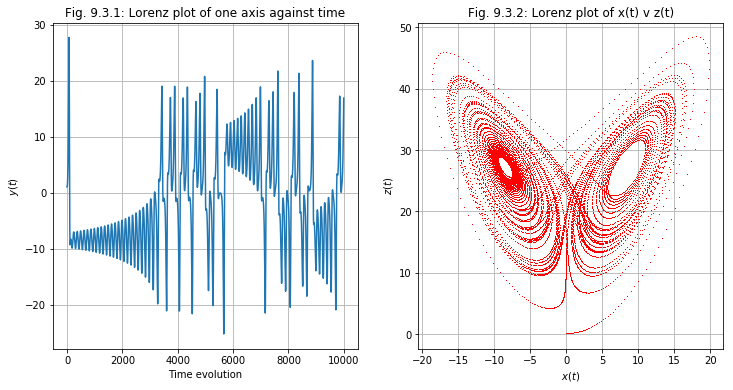

In [56]:
#Now to plot y(t), as in Figure 9.3.1
%matplotlib inline
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(12,6))
ax0.set_title('Fig. 9.3.1: Lorenz plot of one axis against time')
ax0.set_xlabel('Time evolution')
ax0.set_ylabel(r'$y(t)$')
ax0.grid()
ax0.plot(y1)
ax1.set_title('Fig. 9.3.2: Lorenz plot of x(t) v z(t)')
ax1.set_xlabel(r'$x(t)$')
ax1.set_ylabel(r'$z(t)$')
ax1.grid()
ax1.plot(x1,z1,'r,')